In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("BostonHousing.csv")

In [ ]:
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
df.isnull().sum()

,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,0
age,0
dis,0
rad,0
tax,0


In [ ]:
df.shape

(506, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [ ]:
y = df['medv']
x = df.drop('medv', axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4)

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred = reg.predict(x_test)
y_pred

array([19.3009608 , 19.90302713, 24.76125585, 28.32155214, 27.96359044,
       33.9700917 , 12.51005085, 31.3128405 , 19.14660824, 18.60737744,
       14.53910619,  4.49063721, 32.03009274, 23.57619638, 33.80039206,
       29.26073947, 24.41975536, 14.67991003, 26.78373659, 19.98343261,
       27.80286858, 21.41325983, 19.60166235, 21.38277686, 27.53204701,
       21.25301815, 14.52966728, 14.98306694, 38.64659594, 32.77341672,
       18.37263431, 15.74801841, 12.83292372, 21.31559041, 24.59461317,
       14.97354223, 16.18971075, 16.60514502, 26.12107019, 16.72161678,
       35.38802448, 36.89497683, 29.18615073,  7.10754481, 28.07222717,
       10.90825191, 16.5280731 , 18.08350818, 20.97466648, 28.83784582,
       24.68375254, 16.09697191, 28.85797009, 25.841648  ,  6.69721208,
       25.1228567 , 23.86929302, 20.47697443, 16.87625933, 17.10680021,
       23.09091445, 13.5669891 , 18.64688164, 23.00757445, 23.72867126,
       29.92863456, 18.46489277, 24.53587825, 31.895592  , 29.86

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
print(r2_score(y_test, y_pred))
mean_squared_error(y_test, y_pred)

0.7329033509095941


25.098729955979945

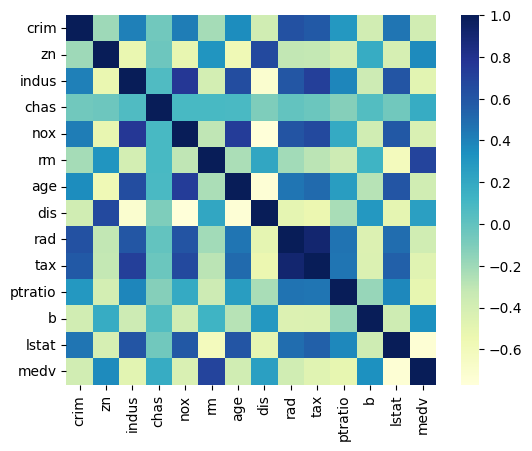

In [ ]:
correlation = df.corr()
sns.heatmap(correlation, square=True, cmap = 'YlGnBu')
plt.show()

In [ ]:
c = reg.intercept_
c

42.82640036153684

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
reg.fit(x_train_scaled, y_train)

LinearRegression()

In [ ]:
reg.predict(x_test_scaled)

array([19.3009608 , 19.90302713, 24.76125585, 28.32155214, 27.96359044,
       33.9700917 , 12.51005085, 31.3128405 , 19.14660824, 18.60737744,
       14.53910619,  4.49063721, 32.03009274, 23.57619638, 33.80039206,
       29.26073947, 24.41975536, 14.67991003, 26.78373659, 19.98343261,
       27.80286858, 21.41325983, 19.60166235, 21.38277686, 27.53204701,
       21.25301815, 14.52966728, 14.98306694, 38.64659594, 32.77341672,
       18.37263431, 15.74801841, 12.83292372, 21.31559041, 24.59461317,
       14.97354223, 16.18971075, 16.60514502, 26.12107019, 16.72161678,
       35.38802448, 36.89497683, 29.18615073,  7.10754481, 28.07222717,
       10.90825191, 16.5280731 , 18.08350818, 20.97466648, 28.83784582,
       24.68375254, 16.09697191, 28.85797009, 25.841648  ,  6.69721208,
       25.1228567 , 23.86929302, 20.47697443, 16.87625933, 17.10680021,
       23.09091445, 13.5669891 , 18.64688164, 23.00757445, 23.72867126,
       29.92863456, 18.46489277, 24.53587825, 31.895592  , 29.86

In [ ]:
def predict_house_price():
    feature_info = {
        'crim': 'per capita crime rate by town (range: 0 to 100)',
        'zn': 'proportion of residential land zoned for lots over 25,000 sq. ft. (range: 0 to 100)',
        'indus': 'proportion of non-retail business acres per town (range: 0 to 30)',
        'chas': 'Charles River dummy variable (0 = not bounded, 1 = bounded)',
        'nox': 'nitric oxides concentration (parts per 10 million) (range: 0.3 to 0.9)',
        'rm': 'average number of rooms per dwelling (range: 3 to 9)',
        'age': 'proportion of owner-occupied units built prior to 1940 (range: 0 to 100)',
        'dis': 'weighted distances to five Boston employment centers (range: 1 to 12)',
        'rad': 'index of accessibility to radial highways (range: 1 to 24)',
        'tax': 'full-value property-tax rate per $10,000 (range: 180 to 720)',
        'ptratio': 'pupil-teacher ratio by town (range: 12 to 22)',
        'b': '1000(Bk - 0.63)^2 where Bk is the proportion of Black residents (range: 0 to 400)',
        'lstat': 'percentage of lower status of the population (range: 2 to 38)'
    }

    user_input = []
    print('Enter values for house')

    for feature, desc in feature_info.items():
        value = float(input(f"Enter value for {feature} {desc} : "))
        user_input.append(value)

    input_date = np.array(user_input).reshape(1, -1)
    # predicted_price1 = reg.predict(input_date)
    input_date_scaled = scaler.transform(input_date)
    # input_date = np.array(user_input).reshape(1, -1)
    predicted_price = reg.predict(input_date)

    print(f"Predicted house price: ${predicted_price[0] * 1000}")
    # print(f"Predicted house price1111: ${predicted_price1[0] * 1000}")

predict_house_price()

Enter values for house
Enter value for crim per capita crime rate by town (range: 0 to 100) : 100
Enter value for zn proportion of residential land zoned for lots over 25,000 sq. ft. (range: 0 to 100) : 100
Enter value for indus proportion of non-retail business acres per town (range: 0 to 30) : 30
Enter value for chas Charles River dummy variable (0 = not bounded, 1 = bounded) : 1
Enter value for nox nitric oxides concentration (parts per 10 million) (range: 0.3 to 0.9) : 0.9
Enter value for rm average number of rooms per dwelling (range: 3 to 9) : 9
Enter value for age proportion of owner-occupied units built prior to 1940 (range: 0 to 100) : 100
Enter value for dis weighted distances to five Boston employment centers (range: 1 to 12) : 12
Enter value for rad index of accessibility to radial highways (range: 1 to 24) : 24
Enter value for tax full-value property-tax rate per $10,000 (range: 180 to 720) : 720
Enter value for ptratio pupil-teacher ratio by town (range: 12 to 22) : 22
En